In [136]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import catboost as cb

In [137]:
#Import the dataset
data=pd.read_csv('datasets/GTZAN/features_3_sec.csv')

# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(data.label.unique()):
    label_index[x] = i
    index_label[i] = x
#print(label_index)
#print(index_label)

# update labels in data to index
data.label = [label_index[l] for l in data.label]

# shuffle samples
data = data.sample(frac=1, random_state=12).reset_index(drop=True)

#Split into features and labels
X=data.iloc[:,2:-1]
Y=data.iloc[:,-1]

#Train:Val:Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    random_state=42,
)

In [138]:
print(f"Train set has {X_train.shape[0]} records out of {len(data)} which is {round(X_train.shape[0]/len(data)*100)}%")
print(f"Val set has {X_val.shape[0]} records out of {len(data)} which is {round(X_val.shape[0]/len(data)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(data)} which is {round(X_test.shape[0]/len(data)*100)}%")

Train set has 6993 records out of 9990 which is 70%
Val set has 1498 records out of 9990 which is 15%
Test set has 1499 records out of 9990 which is 15%


In [139]:
# Standarization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [140]:
#Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [142]:
#Plot Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None,
                filled=True, rounded=True,
                special_characters=True,
                feature_names =X.columns,
                class_names=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
                )
graph = graphviz.Source(dot_data)
graph

In [144]:
#Compute feature importances
feat_imp_dict=dict(zip(X.columns,clf.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp=feat_imp.sort_values(by=['FeatureImportance'], ascending=False)
feat_imp


,FeatureImportance
perceptr_var,0.112349
spectral_bandwidth_mean,0.054909
mfcc1_var,0.052487
mfcc4_mean,0.050191
chroma_stft_mean,0.043004
perceptr_mean,0.041587
harmony_mean,0.028098
mfcc5_var,0.027466
harmony_var,0.026696
rms_mean,0.025382


In [ ]:
# perm_indices = np.argsort(feat_imp.FeatureImportance)[::-1]
# perm_features = [X_val.columns.tolist()[xx] for xx in perm_indices]
# plt.figure(figsize=(14, 14))
# plt.title("Logistic Regression feature importance via permutation importance")
# plt.barh(range(X_val.shape[1]), perm.feature_importances_[perm_indices])
# plt.yticks(range(X_val.shape[1]), perm_features)
# plt.ylim([X_dev.shape[1], -1])
# plt.show()

In [ ]:
X_train[feat_imp[:3]]

Accuracy score: 0.6370913942628419
Overall Precision: 0.639377910977059
Overall Recall:0.6365286676208612
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       160
           1       0.85      0.80      0.83       147
           2       0.50      0.48      0.49       154
           3       0.56      0.55      0.56       145
           4       0.57      0.60      0.58       141
           5       0.67      0.72      0.70       152
           6       0.77      0.79      0.78       143
           7       0.79      0.68      0.73       158
           8       0.60      0.65      0.63       160
           9       0.46      0.47      0.46       139

    accuracy                           0.64      1499
   macro avg       0.64      0.64      0.64      1499
weighted avg       0.64      0.64      0.64      1499



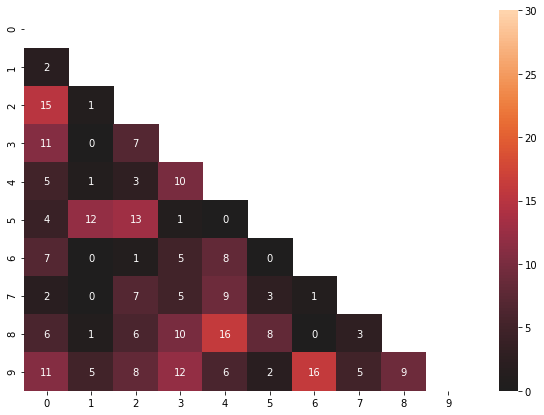

In [145]:

# creating conf matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# predict classes on testing data
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# plotting conf matrix using seaborn
plt.figure(figsize = (10,7))
mask = np.triu(np.ones_like(cm, dtype=np.bool))
sns.heatmap(cm, mask=mask, vmax=30, center=0,annot=True)
# plt.savefig("/home/ashita/ML-Project2021/datasets/saved/Corr_Heatmap30_better.png")

# Predict accuracy,precision_score,recall_score
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Overall Precision: {precision_score(y_test, y_pred,average='macro')}")
print(f"Overall Recall:{recall_score(y_test, y_pred,average='macro')}")
# Print classification Report
print(classification_report(y_test, y_pred))



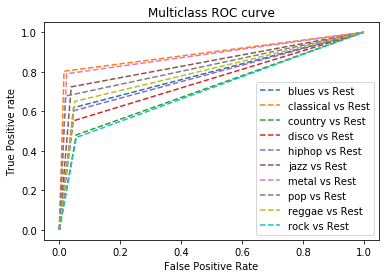

In [146]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
pred_prob = clf.predict_proba(X_test)
classes=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# Plot the ROC chart
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=classes[i] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [148]:
def predictProba(model, X, dev=False):
    y_true = y_train
    if dev:
        X = X_dev[X.columns]
        y_true = y_dev
    y_pred_proba_X = model.predict_proba(X)
    y_pred_X =model.predict(X)
    fig, ax = plt.subplots(figsize=(6, 6))
    skm.plot_confusion_matrix(clf, X, y_true, display_labels=X.columns, cmap=plt.cm.Blues, xticks_rotation=90, ax=ax)
    plt.show()
    print(skm.classification_report(y_true, y_pred_X, digits=3))
    print("=====================================================")

In [147]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(title, ':')
    # # predict classes on testing data
    # cm = confusion_matrix(y_test, y_pred)

    # # plotting conf matrix using seaborn
    # plt.figure(figsize = (10,7))
    # mask = np.triu(np.ones_like(cm, dtype=np.bool))
    # sns.heatmap(cm, mask=mask, vmax=30, center=0,annot=True)
    # # plt.savefig("/home/ashita/ML-Project2021/datasets/saved/Corr_Heatmap30_better.png")

    # Predict accuracy,precision_score,recall_score
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print(f"Overall Precision: {precision_score(y_test, y_pred,average='macro')}")
    print(f"Overall Recall:{recall_score(y_test, y_pred,average='macro')}")
    # Print classification Report
    print(classification_report(y_test, y_pred))

Gradient Boost Classifier :
Accuracy score: 0.8238825883922615
Overall Precision: 0.8266806080093154
Overall Recall:0.8232200760446549
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       160
           1       0.92      0.90      0.91       147
           2       0.72      0.76      0.74       154
           3       0.81      0.74      0.78       145
           4       0.86      0.80      0.83       141
           5       0.80      0.87      0.83       152
           6       0.91      0.91      0.91       143
           7       0.90      0.85      0.88       158
           8       0.76      0.83      0.79       160
           9       0.72      0.73      0.73       139

    accuracy                           0.82      1499
   macro avg       0.83      0.82      0.82      1499
weighted avg       0.83      0.82      0.82      1499

Adaboost Classifier :
Accuracy score: 0.5010006671114076
Overall Precision: 0.48730102839842837
Overall Re

/home/ashita/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:30:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross Gradient Booster :
Accuracy score: 0.9072715143428952
Overall Precision: 0.9080431364823143
Overall Recall:0.9072401472896423
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       160
           1       0.93      0.93      0.93       147
           2       0.85      0.89      0.87       154
           3       0.92      0.90      0.91       145
           4       0.94      0.89      0.91       141
           5       0.87      0.91      0.89       152
           6       0.94      0.95      0.94       143
           7       0.95      0.93      0.94       158
           8       0.90      0.87      0.89       160
           9       0.85      0.88      0.87       139

    accuracy       

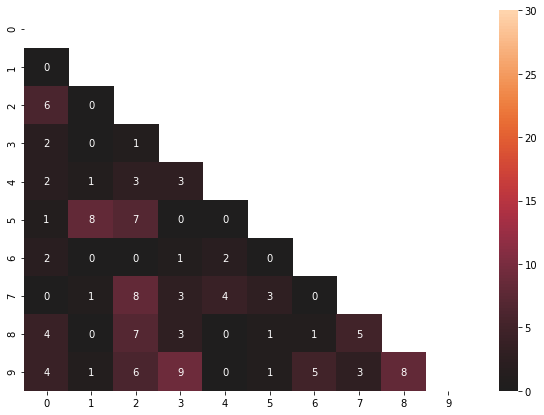

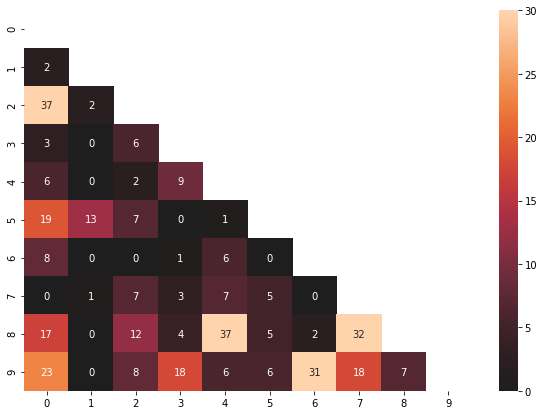

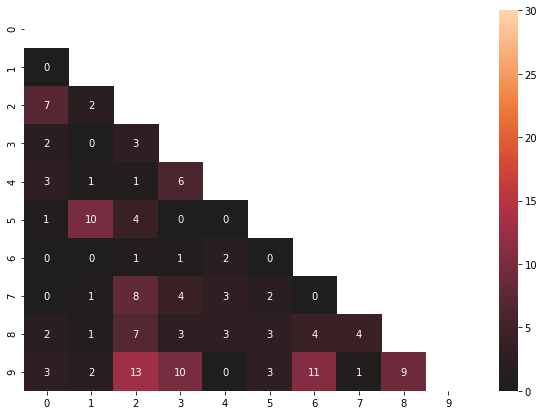

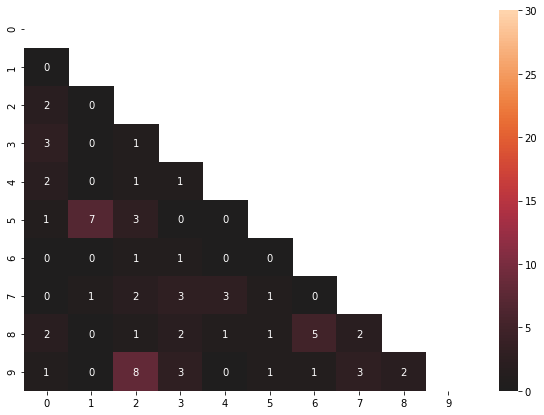

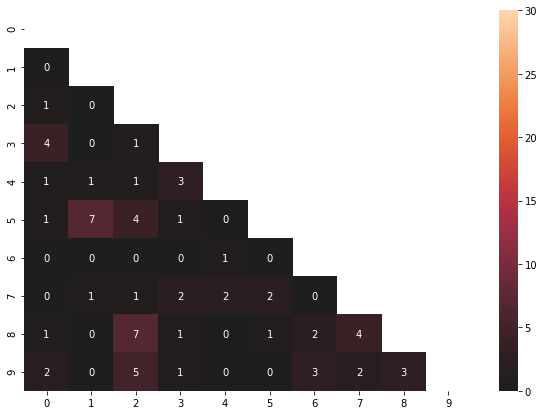

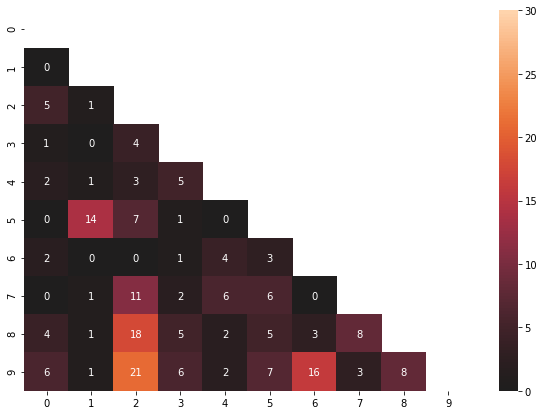

In [150]:
# Gradient Boost
gb = GradientBoostingClassifier(n_estimators=100, random_state=12)
model_assess(gb,"Gradient Boost Classifier")
# Adaboost
abc = AdaBoostClassifier(n_estimators=100, random_state=12)
model_assess(abc,"Adaboost Classifier")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=12)
model_assess(rforest, "Random Forest")
# catboost
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
model_assess(cbc,"Cat Boost Classifier")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

# Model Tuning


## RF Hyperparameter Tuning

In [151]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [10, 140, 270, 400], 'max_depth': [1, 15, 30, 45, 60], 'min_samples_split': [5, 10, 15]}


In [ ]:
# Use grid search to find best hyperparameters
rfc_n = RandomForestClassifier(random_state=12, n_jobs=-1)
rf_random = GridSearchCV(estimator = rfc_n, param_grid=random_grid, cv = 5, verbose=2, n_jobs = -1, scoring='f1_weighted')
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
model_assess(rf_random.best_estimator_, "Random Forest")

## XGB Model HP Tuning

In [152]:
from scipy.stats import uniform,randint
xgb_model = XGBClassifier(n_estimators=100, random_state=12)

xgb_params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [153]:
# Use the random grid to search for best hyperparameters
xgb_random = RandomizedSearchCV(estimator = xgb_model, param_distributions=xgb_params, n_iter=20, cv = 3, verbose=2, n_jobs = -1, random_state=12, scoring='f1_weighted', return_train_score=True)
# Fit the random search model
xgb_random.fit(X_train, y_train)
model_assess(xgb_random.best_estimator_, "Cross Gradient Booster")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
